In [1]:
import scipy as sp
import numpy as np
import pandas as pd

import lightgbm as lgb

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection._search import ParameterSampler

from bayesopt.search import *
from bayesopt.utils import *
from bayesopt.visualization import *

//anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
santander = pd.read_csv('experiment/santander_sample.csv')
X = santander.drop(['target'], axis=1)
y = santander['target']

In [3]:
lgbm = lgb.LGBMClassifier()
cv_rng = np.random.RandomState(0)
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=cv_rng)

In [4]:
param_bounds = {'learning_rate': (0.001, 1.0)}
param_dists = bound_to_dist(param_bounds)

## Random search

In [8]:
rscv_rng = np.random.RandomState(0)
random_scv = RandomSearchCV(lgbm, param_dists, n_iter=20,
                            scoring='roc_auc', cv=cv,
                            random_state=rscv_rng, return_train_score=False,
                            file='tuning/random.bin')
random_scv.fit(X, y)
random_res = random_scv.cv_results_

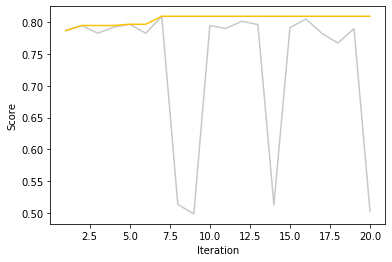

In [9]:
vis_tuning_progress(random_res, greater_is_better=True)

## Bayesian search

In [36]:
bscv_rng = np.random.RandomState(0)
acq_kwargs = {'n_pick': 4}
bayes_scv = BayesianSearchCV(lgbm, param_dists, n_iter=10,
                             scoring='roc_auc', cv=cv, acq_kwargs=acq_kwargs,
                             random_state=bscv_rng, return_train_score=False,
                             file='experiment/bayes.bin', n_initial_points=10)
bayes_scv.fit(X, y)
bayes_res = bayes_scv.cv_results_

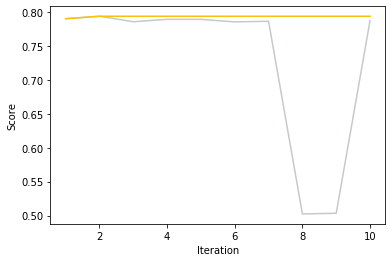

In [37]:
vis_tuning_progress(bayes_res, greater_is_better=True)

/Users/jeongnna/github/bayesian-optimization/bayesopt/visualization.py:82: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


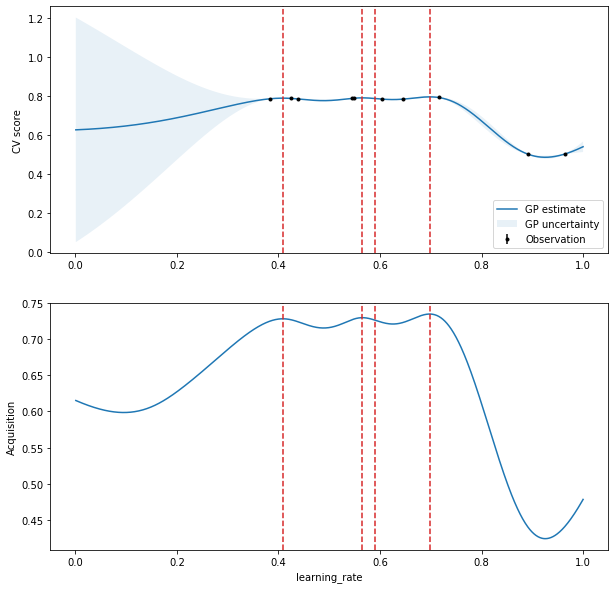

In [47]:
vis_acquisition(bayes_scv, param='learning_rate', step=10)